# Linear regression with Python

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Deaths from lung cancer (per one million)')

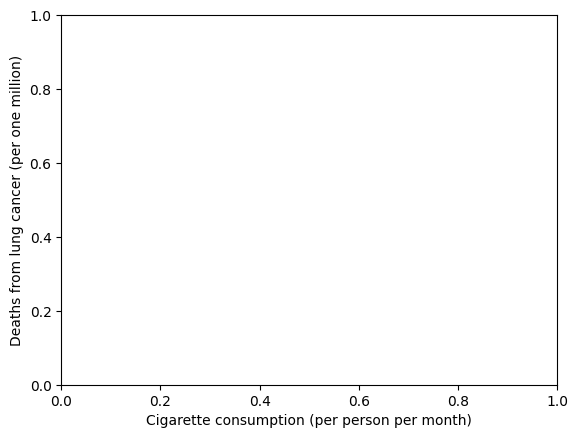

In [8]:
df = pd.DataFrame(
    index = ['Norway', 'Sweeden', 'Denmark', 'Australia'],
    data = {
        'consumption': [250, 300, 350, 470],
        'deaths': [95, 120, 165, 170]
    }
)

Text(0, 0.5, 'Deaths from lung cancer (per one million)')

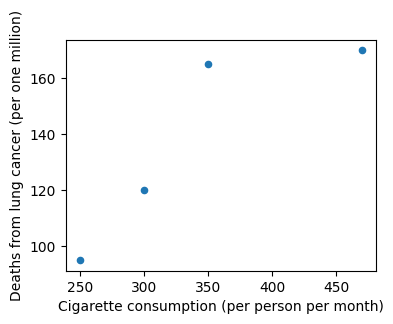

In [9]:
df.plot.scatter(
    figsize=(4,3),
    x = 'consumption',
    y = 'deaths'
)
plt.xlabel('Cigarette consumption (per person per month)')
plt.ylabel('Deaths from lung cancer (per one million)')

In [11]:
# extracting the columns from the data frame
x = df['consumption']
y = df['deaths']


In [14]:
# to compute slope, we need to compute the variance of x and the covariance between x and y

variance = x.var()
covariance = x.cov(y)
print(f"The variance is {variance:.2f}, and the covariance is {covariance:.2f}")

The variance is 8891.67, and the covariance is 3008.33


In [16]:
# Slope a is given by the ration between the covariance and the variance
a = covariance/variance
print(f"The slope is a = {a:.2f}")

The slope is a = 0.34


In [18]:
# The intersection b is computer from means of the x's and y's
b = y.mean() - a*x.mean()
print(f"The intersection is b = {b:.2f}")

The intersection is b = 21.62


In [20]:
# computing y fit
y_fit = a*x +b

# adding the values of y-fit to the table
df['fit'] = y_fit

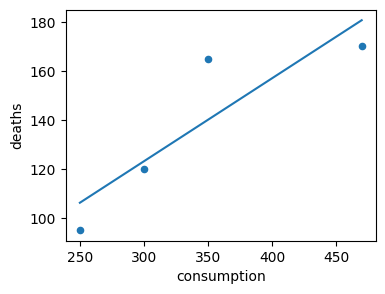

In [21]:
df.plot.scatter(0, 1, figsize=(4,3)) # plot column index 0 against column index 1
plt.plot(x, y_fit, '-')

In [22]:
# computing residuals
residuals = y - y_fit
df['residuals'] = residuals

Text(0, 0.5, 'Residue $y-y_{fit}$')

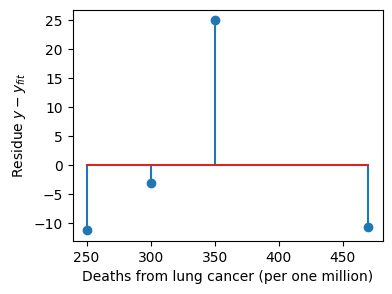

In [25]:
# plot of the residuals = stem plot
plt.figure(figsize=(4,3))
plt.stem(x, residuals)
plt.xlabel('Deaths from lung cancer (per one million)')
plt.ylabel('Residue $y-y_{fit}$')

In [26]:
# displaying the data frame
df

,consumption,deaths,fit,residuals
Norway,250,95,106.204311,-11.204311
Sweeden,300,120,123.120900,-3.120900
Denmark,350,165,140.037488,24.962512
Australia,470,170,180.637301,-10.637301


## Using numpy to get the slope and the intersection (the easy way)

In [28]:
x = df['consumption']
y = df['deaths']

In [29]:
p = np.polyfit(x, y, 1)
a, b = p

In [31]:
print(f"The slope is a = {a:.2f}")
print(f"The intersection is b = {b:.2f}")

The slope is a = 0.34
The intersection is b = 21.62


In [32]:
# The easy way to get fitten values is using the .ployval() method
y_fit_2 = np.polyval(p, x)
y_fit_2


array([106.20431115, 123.12089972, 140.03748828, 180.63730084])

In [34]:
# residuals can be computed with
residuals_2 = y - y_fit_2
residuals_2

Norway      -11.204311
Sweeden      -3.120900
Denmark      24.962512
Australia   -10.637301
Name: deaths, dtype: float64

## Excercise 6.3: fit timber data

The chapter discusses an example of data timber volume. The purpose of these exercises
is that you try how Jupyter/Python can be used to make a linear regression. The code
you need can be found in Section 6.4 (from page 95). You are allowed to use the polyfit
function from the NumPy module (see last part of Section 6.4). Data for this exercise is
available in timber.csv.
    1. Consider the problem where diameter plays the role of x and volume the role of y.
    Plot the data as a scatter plot.
    2. Compute the slope a and the intersection b of the best fitting line.
    3. Compute the values of the best fit for each of the x values (y_fit = a*x + b)
    and include them in the DataFrame (df) as a column named 'fit '.
    4. Make a scatter plot that includes the line of the best fit.
    5. Compute the residuals and add them in the DataFrame as a column named
    'residuals '.
    6. Plot the residuals (use a stem plot).


In [35]:
# 1. Consider the problem where diameter plays the role of x and volume the role of y. Plot the data as a scatter plot.
df = pd.read_csv('timber.csv')

In [36]:
df

,Diameter (in),Height (feet),Volume (cubic feet)
0,8.3,70.0,10.3
1,12.9,85.0,33.8
2,8.6,65.0,10.3
3,13.3,86.0,27.4
4,8.8,63.0,10.2
5,13.7,71.0,25.7
6,10.5,72.0,16.4
7,13.8,64.0,24.9
8,10.7,81.0,18.8
9,14.0,78.0,34.5


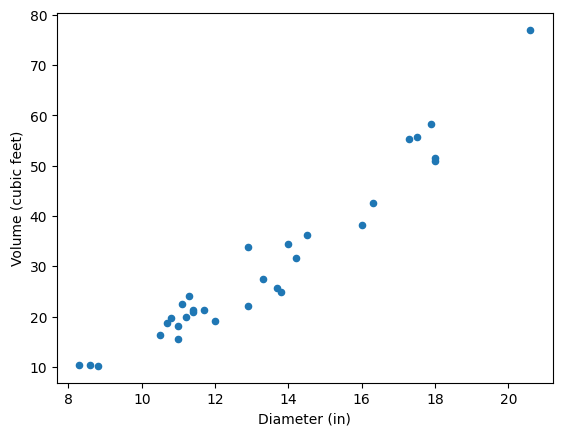

In [43]:
ax1 = df.plot.scatter(x = 'Diameter (in)', y = 'Volume (cubic feet)')

In [44]:
# 2. Compute the slope a and the intersection b of the best fitting line
x = df['Diameter (in)']
y = df['Volume (cubic feet)']

p = np.polyfit(x, y, 1)
a, b, = p
print(f"The slope is a = {a:.2f}")
print(f"The intersection is b = {b:.2f}")

The slope is a = 5.07
The intersection is b = -36.94


In [45]:
# 3. Compute the values of the best fit for each of the x values (y_fit = a*x + b) and include them in the DataFrame (df) as a column named 'fit '.

# computing y fit
y_fit = a*x +b

# adding the values of y-fit to the table
df['fit'] = y_fit


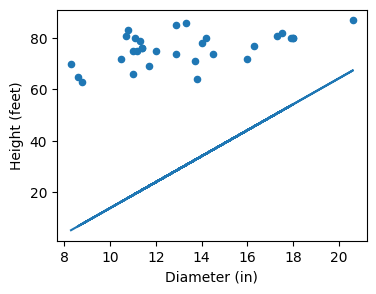

In [51]:
# 4. Make a scatter plot that includes the line of the best fit.
y_line = p[1] + p[0] * x

df.plot.scatter(0, 1, figsize=(4,3)) # plot column index 0 against column index 1
plt.plot(x, y_line, '-')

In [54]:
# 5 Compute the residuals and add them in the DataFrame as a column named 'residuals '.

# residuals can be computed with
residuals = y - y_fit
residuals

0     5.196851
1     5.393911
2     3.677094
3    -3.032431
4     2.563923
5    -6.758774
6     0.151967
7    -8.065360
8     1.538795
9     0.521469
10    1.932210
11   -3.291702
12   -3.180962
13   -0.211459
14   -0.580962
15   -5.810244
16    3.312453
17   -3.030001
18    0.105867
19    4.704143
20    3.899282
21    3.990972
22    0.192696
23    4.564629
24    0.592696
25   -2.741956
26   -1.027061
27   -3.241956
28   -4.746818
29    9.586817
30   -6.206089
dtype: float64

<StemContainer object of 3 artists>

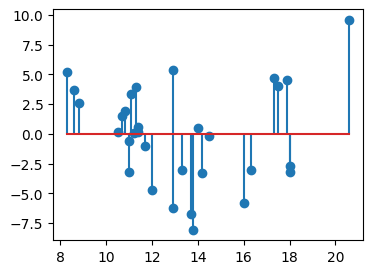

In [55]:
# plot of the residuals = stem plot
plt.figure(figsize=(4,3))
plt.stem(x, residuals)


## Exercise 6.4: Fit popcorn data
In this exercise, we will continue the investigation of the popcorn data that we collected
during the exercise on page 45.
1. Make a scatter plot of the short (x-axis) versus the long (y-axis) dimensions of the
popcorn.
2. Determine the slope a and the intersection for the best fit line with the short
dimension as x and the long dimension as y.

## Exercise 6.5: Your fitting function

(This exercise is optional, but if you do it, then you are allowed to use the result in other
exercises). Write a Python function named best_linear_fit (x, y) that makes
a scatter plot of x versus y and shows the best fit line. See Appendix for the syntax
to make Python functions. With this function, you do not have to copy the same code
again-and-again to fit a line.
    1. Use the function to fit the timber data of this chapter (Table 6.1 page 85; timber.
    csv).
    2. Extend the function so that it also plots the residuals.
    3. Place the function in a module using a file named fitting .py. Demonstrate
    that you can use the module in another notebook by investigating the timber data
    again.

## Exercise 6.6: Growth of population

(Optional.) The Table 6.4 shows the population of the United States over the period
1790-1910. In this exercise we will fit the US-population growth to a straight line. Data
for this exercise is available in USpop.csv.
1. Plot the data in a scatter plot.
2. What is the independent variable (the variable we called x)?
3. What is the dependent variable (the variable we called y)?
4. Which assumptions are we making about the error and variation in the data? Is
the error associated with time or with population size? Is this a good way to look
at the errors?
5. Find the best fitting straight line.
6. What is the population in 1885 according to your model? (Here we use the model to
determine the value of y at a time where we don’t have a data point. This process
is called interpolation.)
7. What is the population in 2000 according to the model? (This process is called
extrapolation. You may compare to the actual size of the US population in 2000
(282 mill.).)
8. What is the population in 1870 according to your model? What was the population
actually in 1870? What is the residual in 1870?
9. Make a plot of the residuals. Do you see a systematic pattern? Is this a good
model?
10. What is the (measurement) unit of the two parameters a and b?
11. What is the interpretation of a and b?